## Visualise wavelet filter

Just want to create a simple notebook to plot a wavelet for a given set of parameters. The wavelets are generated in `scattering2d/filter_bank.py`, which is called by the various interfaces in `frontend` which provide functions to perform the convolutions with an input field easily.

Here let's just plot the filters, where another notebook can look at showing the convolved fields.

In [1]:
from kymatio.numpy import Scattering2D
from kymatio.scattering2d.filter_bank import morlet_2d
from kymatio.scattering2d.utils import fft2
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi
import pylab as plt
from colorsys import hls_to_rgb

In [2]:
## Function to plot complex arrays using imshow
## https://stackoverflow.com/questions/17044052/matplotlib-imshow-complex-2d-array
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + pi)  / (2 * pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c

In [3]:
test_filter=morlet_2d(M=128,N=128,sigma=3,theta=1,xi=0.5,slant=0.5)

In [12]:
test_filter

array([[0.00056728-6.0053541e-36j, 0.00056142+9.2573995e-05j,
        0.00054406+1.8258106e-04j, ..., 0.00051587-2.6756950e-04j,
        0.00054406-1.8258106e-04j, 0.00056142-9.2573995e-05j],
       [0.00056371+5.9482329e-05j, 0.00055289+1.5118491e-04j,
        0.00053078+2.3951578e-04j, ..., 0.00052698-2.1042796e-04j,
        0.00055043-1.2384956e-04j, 0.00056286-3.3052071e-05j],
       [0.0005531 +1.1756008e-04j, 0.00053751+2.0750267e-04j,
        0.00051095+2.9331303e-04j, ..., 0.00053125-1.5200803e-04j,
        0.00054979-6.4711858e-05j, 0.00055721+2.5973462e-05j],
       ...,
       [0.00053578-1.7288346e-04j, 0.00054468-8.3124949e-05j,
        0.00054222+6.5539211e-06j, ..., 0.00044497-4.1819137e-04j,
        0.00048511-3.4273404e-04j, 0.00051572-2.6022427e-04j],
       [0.0005531 -1.1756008e-04j, 0.00055721-2.5973462e-05j,
        0.00054979+6.4711858e-05j, ..., 0.00047433-3.7267155e-04j,
        0.00051095-2.9331303e-04j, 0.00053751-2.0750267e-04j],
       [0.00056371-5.9482329

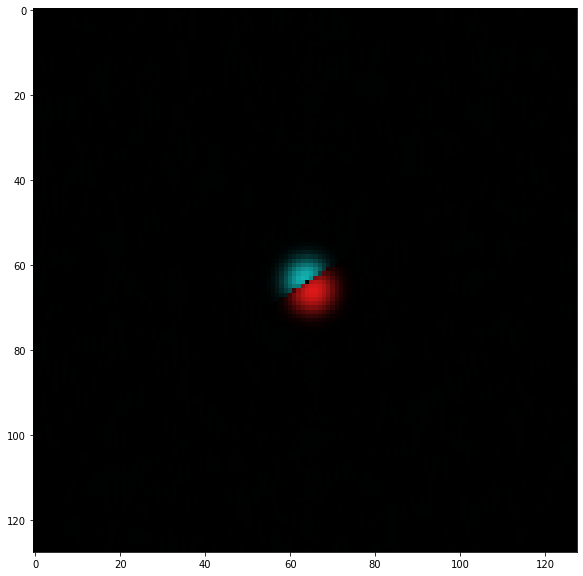

In [4]:
test_filter=morlet_2d(M=128,N=128,sigma=12,theta=1,xi=0.1,slant=1.0)
filter_c = fft2(test_filter)
filter_c = np.fft.fftshift(filter_c)
plt.figure(figsize=(10,10))
plt.imshow(colorize(filter_c))

In [5]:
test_filter.real

array([[0.00056728, 0.00056142, 0.00054406, ..., 0.00051587, 0.00054406,
        0.00056142],
       [0.00056371, 0.00055289, 0.00053078, ..., 0.00052698, 0.00055043,
        0.00056286],
       [0.0005531 , 0.00053751, 0.00051095, ..., 0.00053125, 0.00054979,
        0.00055721],
       ...,
       [0.00053578, 0.00054468, 0.00054222, ..., 0.00044497, 0.00048511,
        0.00051572],
       [0.0005531 , 0.00055721, 0.00054979, ..., 0.00047433, 0.00051095,
        0.00053751],
       [0.00056371, 0.00056286, 0.00055043, ..., 0.00049818, 0.00053078,
        0.00055289]], dtype=float32)

In [6]:
scattering = Scattering2D(J=2, shape=(32, 32))

In [7]:
test_array=np.ones((32,32))-0.9

In [8]:
scattered=scattering(test_array)

In [9]:
np.shape(scattered[0])

(8, 8)

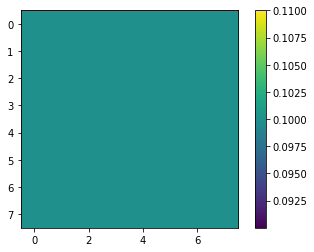

In [10]:
plt.imshow(scattered[0])
plt.colorbar()

In [11]:
scattered[0]

array([[0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294],
       [0.10000294, 0.10000294, 0.10000294, 0.10000294, 0.10000294,
        0.10000294, 0.10000294, 0.10000294]])